In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración visual
plt.style.use('ggplot')

try:
    df_end = pd.read_csv("../data/EndInvFINAL12312016.csv")
    print("✅ Archivo EndInv cargado con éxito.")
except FileNotFoundError:
    print("❌ Error: No encuentro el archivo.")

# 2. Vistazo general
print(f"\nDimensiones: {df_end.shape} (Filas, Columnas)")
print("\n--- Primeras 5 filas ---")
display(df_end.head())

print("\n--- Tipos de datos y Nulos ---")
df_end.info()   

# 3. Chequeo de duplicados (Importante para la Primary Key)
# Supuestamente (InventoryId) debería ser único o la combinación (Store + Brand)
duplicados = df_end.duplicated().sum()
print(f"\n--- Filas duplicadas totales: {duplicados} ---")





✅ Archivo EndInv cargado con éxito.

Dimensiones: (224489, 9) (Filas, Columnas)

--- Primeras 5 filas ---


,InventoryId,Store,City,Brand,Description,Size,onHand,Price,endDate
0,1_HARDERSFIELD_58,1,HARDERSFIELD,58,Gekkeikan Black & Gold Sake,750mL,11,12.99,2016-12-31
1,1_HARDERSFIELD_62,1,HARDERSFIELD,62,Herradura Silver Tequila,750mL,7,36.99,2016-12-31
2,1_HARDERSFIELD_63,1,HARDERSFIELD,63,Herradura Reposado Tequila,750mL,7,38.99,2016-12-31
3,1_HARDERSFIELD_72,1,HARDERSFIELD,72,No. 3 London Dry Gin,750mL,4,34.99,2016-12-31
4,1_HARDERSFIELD_75,1,HARDERSFIELD,75,Three Olives Tomato Vodka,750mL,7,14.99,2016-12-31



--- Tipos de datos y Nulos ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224489 entries, 0 to 224488
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InventoryId  224489 non-null  object 
 1   Store        224489 non-null  int64  
 2   City         224489 non-null  object 
 3   Brand        224489 non-null  int64  
 4   Description  224489 non-null  object 
 5   Size         224489 non-null  object 
 6   onHand       224489 non-null  int64  
 7   Price        224489 non-null  float64
 8   endDate      224489 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 15.4+ MB

--- Filas duplicadas totales: 0 ---


In [6]:
# 1. Estadística descriptiva rápida
print("\n--- Estadísticas de Stock y Precios ---")
display(df_end[['onHand', 'Price']].describe())

# 2. CREACIÓN DE KPI: Valor del Inventario (Cantidad * Precio)
# Esto es PLATA INMOVILIZADA
df_end['Invested_Capital'] = df_end['onHand'] * df_end['Price']

total_inmovilizado = df_end['Invested_Capital'].sum()
print(f"\n💰 CAPITAL TOTAL INMOVILIZADO AL 31/DIC/2016: ${total_inmovilizado:,.2f}")

# 3. Top 10 Productos con más capital dormido
top_products = df_end.groupby(['Brand', 'Description'])['Invested_Capital'].sum().sort_values(ascending=False).head(10)

print("\n--- Top 10 Productos que más plata nos retienen ---")
display(top_products)


--- Estadísticas de Stock y Precios ---


,onHand,Price
count,224489.000000,224489.000000
mean,21.763988,23.585583
std,37.233576,79.202775
min,0.000000,0.490000
25%,7.000000,9.990000
50%,12.000000,14.990000
75%,22.000000,23.490000
max,3676.000000,13999.900000



💰 CAPITAL TOTAL INMOVILIZADO AL 31/DIC/2016: $79,704,851.13

--- Top 10 Productos que más plata nos retienen ---


Brand  Description               
1233   Jack Daniels No 7 Black       526494.53
3545   Ketel One Vodka               502932.30
2753   Johnnie Walker Black Label    470861.51
8068   Absolut 80 Proof              366631.92
3405   Tito's Handmade Vodka         355649.32
4261   Capt Morgan Spiced Rum        351981.31
2757   Johnnie Walker Red Label      336370.97
2589   Jameson Irish Whiskey         300956.78
1376   Jim Beam                      276648.20
2585   Jameson Irish Whiskey         272557.13
Name: Invested_Capital, dtype: float64

C:\Users\Usuario\AppData\Local\Temp\ipykernel_19236\576888022.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=store_inventory.head(10).index, y=store_inventory.head(10).values, palette="Reds_r", order=store_inventory.head(10).index)
C:\Users\Usuario\AppData\Local\Temp\ipykernel_19236\576888022.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(['${:,.0f}'.format(x) for x in current_values])


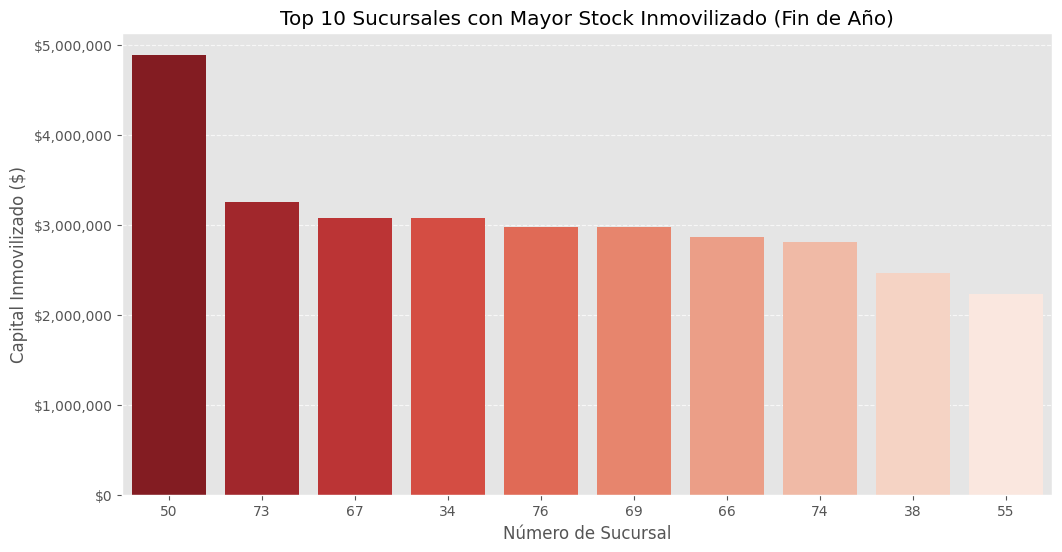

La sucursal con más stock es la N° 50 con $4,887,260.68


In [7]:
# 1. Agrupar por Sucursal (Store)
store_inventory = df_end.groupby('Store')['Invested_Capital'].sum().sort_values(ascending=False)

# 2. Graficar el Top 10 Sucursales
plt.figure(figsize=(12, 6))
sns.barplot(x=store_inventory.head(10).index, y=store_inventory.head(10).values, palette="Reds_r", order=store_inventory.head(10).index)

plt.title('Top 10 Sucursales con Mayor Stock Inmovilizado (Fin de Año)')
plt.ylabel('Capital Inmovilizado ($)')
plt.xlabel('Número de Sucursal')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Formatear el eje Y a millones/miles para que se lea mejor
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['${:,.0f}'.format(x) for x in current_values])

plt.show()

# Dato curioso: ¿Cuál es la sucursal número 1?
print(f"La sucursal con más stock es la N° {store_inventory.index[0]} con ${store_inventory.iloc[0]:,.2f}")